In [1]:
import rasterio
import numpy as np
# from scipy import stats as st
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator
import matplotlib.cbook as cbook
import seaborn as sns

import os

# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
# from sklearn import linear_model
# from sklearn import metrics

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [2]:
address_NAIP_2010=r'D:\Cambridge\temp\Compare\2010\2010\Albedo2010_NAIP50_corrected.img'
address_NAIP_2013=r'D:\Cambridge\temp\Compare\2013\2013\Albedo2013_NAIP.img'
address_NAIP_2018=r'D:\Cambridge\temp\Compare\2018\2018\Albedo2018_NAIP.img'

address_ortho80_2010=r'D:\Cambridge\temp\Compare\2010\2010\Albedo2010_Ortho80_corrected.img'
address_ortho80_2013=r'D:\Cambridge\temp\Compare\2013\2013\Albedo2013_Ortho80.img'
address_ortho80_2018=r'D:\Cambridge\temp\Compare\2018\2018\Albedo2018_Ortho80.img'


# read Naip rasters

In [3]:
with rasterio.open(address_NAIP_2010,'r') as rst:
    albedo2010_ar=rst.read(1).astype('float64')
    kwds = rst.meta.copy()
    cellSize= kwds['transform'][0]
    albedo2010_nodata= rst.nodata
    albedo2010_ar[albedo2010_ar==albedo2010_nodata]= -100

with rasterio.open(address_NAIP_2013,'r') as rst:
    albedo2013_ar=rst.read(1).astype('float64')
    albedo2013_nodata= rst.nodata
    albedo2013_ar[albedo2013_ar==albedo2013_nodata]= -100

    
with rasterio.open(address_NAIP_2018,'r') as rst:
    albedo2018_ar=rst.read(1).astype('float64')
    albedo2018_nodata= rst.nodata
    albedo2018_ar[albedo2018_ar==albedo2018_nodata]= -100


# Read ortho rasters

In [4]:
with rasterio.open(address_ortho80_2010,'r') as rst:
    albedo_ortho80_2010_ar=rst.read(1).astype('float64')
    kwds = rst.meta.copy()
    cellSize= kwds['transform'][0]
    nodata= rst.nodata
    albedo_ortho80_2010_ar[albedo_ortho80_2010_ar==nodata]= -100

with rasterio.open(address_ortho80_2013,'r') as rst:
    albedo2013_ortho_2013_ar=rst.read(1).astype('float64')
    nodata= rst.nodata
    albedo2013_ortho_2013_ar[albedo2013_ortho_2013_ar==nodata]= -100

    
with rasterio.open(address_ortho80_2018,'r') as rst:
    albedo2018_Orhto_2018_ar=rst.read(1).astype('float64')
    nodata= rst.nodata
    albedo2018_Orhto_2018_ar[albedo2018_Orhto_2018_ar==nodata]= -100


In [5]:
albedo2018_Orhto_2018_ar.max()

0.94

In [6]:
df = pd.DataFrame({'albedo_NAIP_10': albedo2010_ar.flatten(), 'albedo_NAIP_13': albedo2013_ar.flatten(),'albedo_NAIP_18': albedo2018_ar.flatten(),
                   'albedo_ortho_10': albedo_ortho80_2010_ar.flatten(),'albedo_ortho_13': albedo2013_ortho_2013_ar.flatten(),'albedo_ortho_18': albedo2018_Orhto_2018_ar.flatten()
                  })

In [7]:
df.sample(10)

,albedo_NAIP_10,albedo_NAIP_13,albedo_NAIP_18,albedo_ortho_10,albedo_ortho_13,albedo_ortho_18
34924638,0.898,0.864142,0.81,0.412915,0.856551,0.71
11944844,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
40965960,-100.000,0.814592,-100.00,-100.000000,0.774154,-100.00
40152230,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
36018809,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
34691460,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
3767608,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
22102244,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
19954480,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00
23457098,-100.000,-100.000000,-100.00,-100.000000,-100.000000,-100.00


In [12]:
dfFiltered_NAIP=df[(df['albedo_NAIP_10']>=0)&(df['albedo_NAIP_13']>=0)&(df['albedo_NAIP_18']>=0)]
dfFiltered_Ortho=df[(df['albedo_ortho_10']>=0)&(df['albedo_ortho_13']>=0)&(df['albedo_ortho_18']>=0)]
dfClean = df[(df['albedo_NAIP_10']>=0)&(df['albedo_NAIP_13']>=0)&(df['albedo_NAIP_18']>=0)&(df['albedo_ortho_10']>=0)&(df['albedo_ortho_13']>=0)&(df['albedo_ortho_18']>=0)]

In [9]:
dfFiltered_Ortho

,albedo_NAIP_10,albedo_NAIP_13,albedo_NAIP_18,albedo_ortho_10,albedo_ortho_13,albedo_ortho_18
215537,0.438510,0.392928,0.47,0.246308,0.321529,0.39
215538,0.438510,0.392928,0.47,0.246308,0.321529,0.39
215539,0.438510,0.392928,0.47,0.246308,0.321529,0.39
215540,0.438510,0.392928,0.47,0.246308,0.321529,0.39
215541,0.438510,0.392928,0.47,0.246308,0.321529,0.39
...,...,...,...,...,...,...
45018628,0.639059,0.663303,0.66,0.477509,0.429732,0.55
45018629,0.639059,0.663303,0.66,0.477509,0.429732,0.55
45018630,0.639059,0.663303,0.66,0.477509,0.429732,0.55
45018631,0.639059,0.663303,0.66,0.477509,0.429732,0.55


# Albedo NAIP

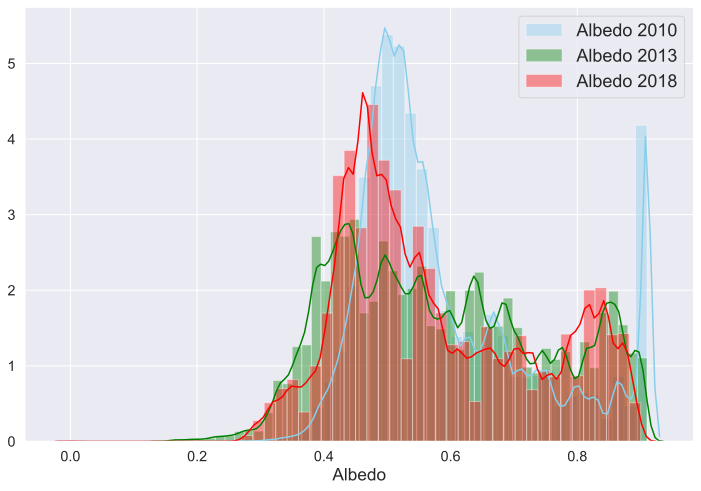

In [21]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot( dfFiltered["albedo10"] , color="skyblue", label="Albedo 2010")
sns.distplot( dfFiltered["albedo13"] , color="green", label="Albedo 2013")
sns.distplot( dfFiltered["albedo18"] , color="red", label="Albedo 2018")
#sns.distplot( playDf["tc_predict2"] , color="navy", label="Corrected Tree Cover2")

plt.tick_params(axis='x',labelsize='large' )
plt.tick_params(axis='y',labelsize='large' )
plt.xlabel ('Albedo',fontsize='x-large')
plt.legend(loc='upper right',prop={'size': 18})
plt.show()

In [10]:
dfFiltered_Ortho.sample(2)

,albedo_NAIP_10,albedo_NAIP_13,albedo_NAIP_18,albedo_ortho_10,albedo_ortho_13,albedo_ortho_18
25351794,0.428706,0.455803,0.46,0.329561,0.519223,0.64
17825093,0.544706,0.634498,0.46,0.322077,0.348862,0.43


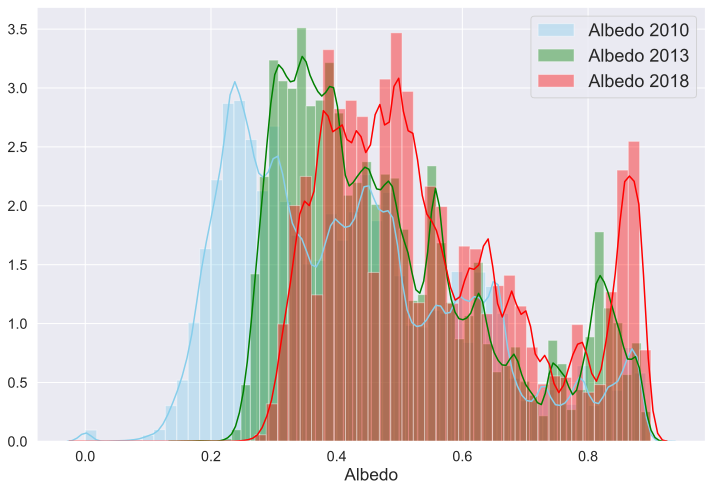

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot( dfFiltered_Ortho["albedo_ortho_10"] , color="skyblue", label="Albedo 2010")
sns.distplot( dfFiltered_Ortho["albedo_ortho_13"] , color="green", label="Albedo 2013")
sns.distplot( dfFiltered_Ortho["albedo_ortho_18"] , color="red", label="Albedo 2018")
#sns.distplot( playDf["tc_predict2"] , color="navy", label="Corrected Tree Cover2")

plt.tick_params(axis='x',labelsize='large' )
plt.tick_params(axis='y',labelsize='large' )
plt.xlabel ('Albedo',fontsize='x-large')
plt.legend(loc='upper right',prop={'size': 18})
plt.show()

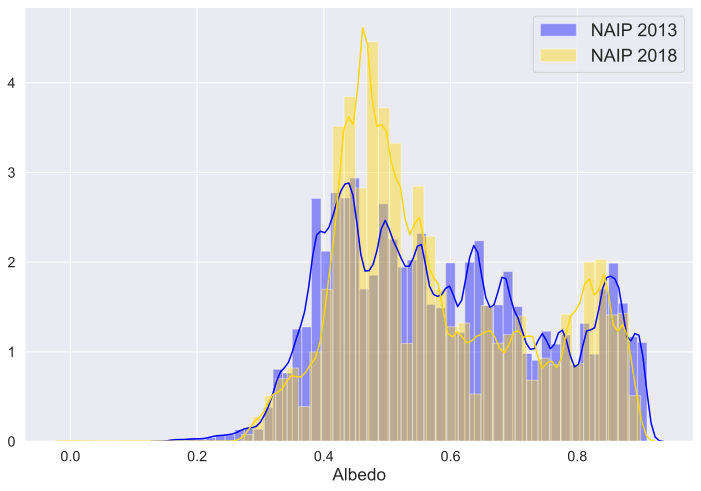

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
# sns.distplot( dfClean["albedo_ortho_10"] , color="skyblue", label="Ortho 2010")
# sns.distplot( dfClean["albedo_ortho_13"] , color="green", label="Ortho 2013")
# sns.distplot( dfClean["albedo_ortho_18"] , color="red", label="Ortho 2018")

# sns.distplot( dfClean["albedo_NAIP_10"] , color="yellow", label="NAIP 2010")
sns.distplot( dfClean["albedo_NAIP_13"] , color="blue", label="NAIP 2013")
sns.distplot( dfClean["albedo_NAIP_18"] , color="gold", label="NAIP 2018")
#sns.distplot( playDf["tc_predict2"] , color="navy", label="Corrected Tree Cover2")

plt.tick_params(axis='x',labelsize='large' )
plt.tick_params(axis='y',labelsize='large' )
plt.xlabel ('Albedo',fontsize='x-large')
plt.legend(loc='upper right',prop={'size': 18})
plt.show()